In [1]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import string

In [2]:
df=pd.read_csv('C:\\Users\\ADMIN\\Desktop\\New folder\\data\\train.csv')
df.head()

,tweet_id,tweet,sentiment
0,1701,#sxswnui #sxsw #apple defining language of tou...,1
1,1851,Learning ab Google doodles! All doodles should...,1
2,2689,one of the most in-your-face ex. of stealing t...,2
3,4525,This iPhone #SXSW app would b pretty awesome i...,0
4,3604,Line outside the Apple store in Austin waiting...,1


In [3]:
df.shape

(7274, 3)

In [4]:
df.columns

Index(['tweet_id', 'tweet', 'sentiment'], dtype='object')

In [5]:
df.nunique()

tweet_id     7274
tweet        7255
sentiment       4
dtype: int64

In [6]:
df['sentiment'].value_counts()

1    4311
2    2382
0     456
3     125
Name: sentiment, dtype: int64

In [7]:
df['sentiment'].value_counts().plot(kind='bar',title="sentiment analysis")

In [8]:
df.isnull().sum()

tweet_id     0
tweet        1
sentiment    0
dtype: int64

In [9]:
df["tweet"].fillna("No Tweet", inplace = True)

In [10]:
df.describe()

,tweet_id,sentiment
count,7274.000000,7274.000000
mean,4531.736871,1.299148
std,2617.858745,0.607829
min,2.000000,0.000000
25%,2261.500000,1.000000
50%,4530.500000,1.000000
75%,6796.750000,2.000000
max,9092.000000,3.000000


In [11]:
df['length_train'] = df['tweet'].str.len()
df['length_train']

0        89
1       143
2       132
3       125
4        77
5       115
6        82
7       119
8        46
9        79
10       81
11       49
12       75
13      138
14       99
15      126
16      138
17      131
18       92
19       81
20       60
21      123
22      132
23       94
24      126
25       61
26       97
27       85
28      138
29      138
       ... 
7244     78
7245    122
7246    142
7247    113
7248    136
7249     86
7250    117
7251     85
7252    128
7253    110
7254     94
7255    119
7256    119
7257    103
7258     92
7259    135
7260     50
7261    140
7262     98
7263    138
7264     77
7265     86
7266    129
7267    116
7268    133
7269     93
7270     91
7271    140
7272     92
7273    137
Name: length_train, Length: 7274, dtype: int64

In [12]:
df['length_train'].min()

8

In [13]:
df['length_train'].max()

178

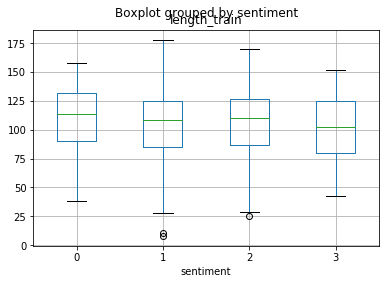

In [14]:
import matplotlib.pyplot as plt
df.boxplot(column='length_train', by='sentiment')
plt.show()

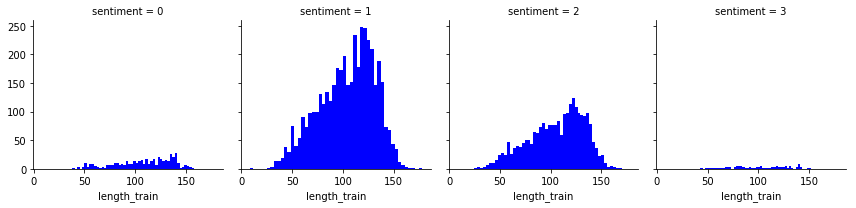

In [15]:
import seaborn as sns
graph = sns.FacetGrid(data=df,col='sentiment')
graph.map(plt.hist,'length_train',bins=50,color='blue')

In [16]:

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [17]:
from sklearn.feature_selection import chi2

tfidf = TfidfVectorizer(max_features=30000,ngram_range=(1, 3))
X_tfidf = tfidf.fit_transform(df.tweet)
y = df.sentiment
chi2score = chi2(X_tfidf, y)[0]

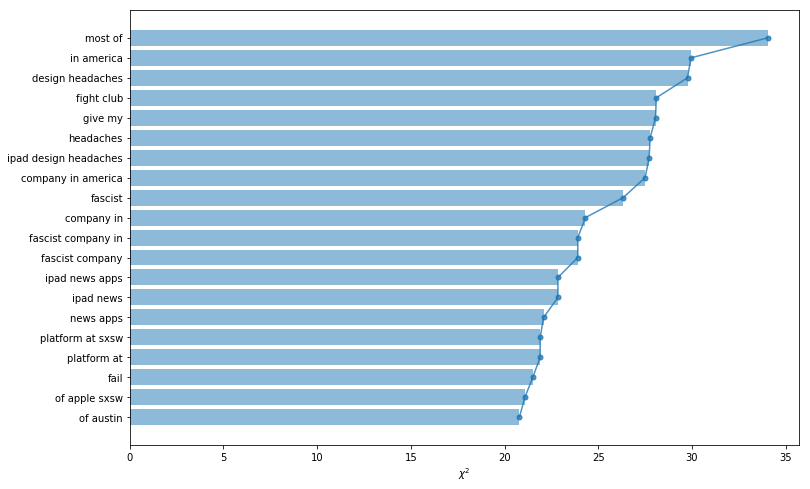

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
scores = list(zip(tfidf.get_feature_names(), chi2score))
chi2 = sorted(scores, key=lambda x:x[1])
topchi2 = list(zip(*chi2[-20:]))
x = range(len(topchi2[1]))
labels = topchi2[0]
plt.barh(x,topchi2[1], align='center', alpha=0.5)
plt.plot(topchi2[1], x, '-o', markersize=5, alpha=0.8)
plt.yticks(x, labels)
plt.xlabel('$\chi^2$')
plt.show();

We can observe that the features with a high χ2 can be considered relevant for the sentiment classes we are analyzing.
For example, the top 5 most useful feature selected by Chi-square test are “not”, “disappointed”, “very disappointed”, “not buy” and “worst”. I assume they are mostly from negative reviews. The next most useful feature selected by Chi-square test is “great”, I assume it is from mostly the positive reviews.

In [19]:
s=string.punctuation
s

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
df1=df.copy()

In [21]:
df1['word_count'] = df['tweet'].apply(lambda x : len(x.split()))
df1['char_count'] = df['tweet'].apply(lambda x : len(x.replace(" ","")))
df1['word_density'] = df1['word_count'] / (df1['char_count'] + 1)
df1['punc_count'] = df['tweet'].apply(lambda x : len([a for a in x if a in s]))

df1[['word_count', 'char_count', 'word_density', 'punc_count']].head(10)

,word_count,char_count,word_density,punc_count
0,12,78,0.151899,3
1,19,125,0.150794,8
2,22,110,0.198198,12
3,19,107,0.175926,5
4,14,63,0.218750,3
5,18,98,0.181818,11
6,12,70,0.169014,8
7,20,100,0.198020,5
8,7,40,0.170732,4
9,15,65,0.227273,4


# Data Cleaning

In [22]:
df.drop(df[df['sentiment'] == 3].index, inplace = True) #droping 3bcoz it doesnt add any value
df.shape

(7149, 4)

In [23]:
df.head()

,tweet_id,tweet,sentiment,length_train
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,89
1,1851,Learning ab Google doodles! All doodles should...,1,143
2,2689,one of the most in-your-face ex. of stealing t...,2,132
3,4525,This iPhone #SXSW app would b pretty awesome i...,0,125
4,3604,Line outside the Apple store in Austin waiting...,1,77


In [24]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

In [25]:
df['new_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*") 
df.head(10)

,tweet_id,tweet,sentiment,length_train,new_tweet
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,89,#sxswnui #sxsw #apple defining language of tou...
1,1851,Learning ab Google doodles! All doodles should...,1,143,Learning ab Google doodles! All doodles should...
2,2689,one of the most in-your-face ex. of stealing t...,2,132,one of the most in-your-face ex. of stealing t...
3,4525,This iPhone #SXSW app would b pretty awesome i...,0,125,This iPhone #SXSW app would b pretty awesome i...
4,3604,Line outside the Apple store in Austin waiting...,1,77,Line outside the Apple store in Austin waiting...
5,966,#technews One lone dude awaits iPad 2 at Apple...,1,115,#technews One lone dude awaits iPad 2 at Apple...
6,1395,"SXSW Tips, Prince, NPR Videos, Toy Shopping Wi...",1,82,"SXSW Tips, Prince, NPR Videos, Toy Shopping Wi..."
7,8182,NU user RT @mention New #UberSocial for #iPhon...,1,119,NU user RT New #UberSocial for #iPhone now in...
8,8835,Free #SXSW sampler on iTunes {link} #FreeMusic,2,46,Free #SXSW sampler on iTunes {link} #FreeMusic
9,883,I think I might go all weekend without seeing ...,2,79,I think I might go all weekend without seeing ...


In [26]:
df['new_tweet'] = df['new_tweet'].str.replace("[^a-zA-Z#]", " ")#Removing Punctuations, Numbers, and Special Characters
df.head(10)

,tweet_id,tweet,sentiment,length_train,new_tweet
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,89,#sxswnui #sxsw #apple defining language of tou...
1,1851,Learning ab Google doodles! All doodles should...,1,143,Learning ab Google doodles All doodles should...
2,2689,one of the most in-your-face ex. of stealing t...,2,132,one of the most in your face ex of stealing t...
3,4525,This iPhone #SXSW app would b pretty awesome i...,0,125,This iPhone #SXSW app would b pretty awesome i...
4,3604,Line outside the Apple store in Austin waiting...,1,77,Line outside the Apple store in Austin waiting...
5,966,#technews One lone dude awaits iPad 2 at Apple...,1,115,#technews One lone dude awaits iPad at Apple...
6,1395,"SXSW Tips, Prince, NPR Videos, Toy Shopping Wi...",1,82,SXSW Tips Prince NPR Videos Toy Shopping Wi...
7,8182,NU user RT @mention New #UberSocial for #iPhon...,1,119,NU user RT New #UberSocial for #iPhone now in...
8,8835,Free #SXSW sampler on iTunes {link} #FreeMusic,2,46,Free #SXSW sampler on iTunes link #FreeMusic
9,883,I think I might go all weekend without seeing ...,2,79,I think I might go all weekend without seeing ...


In [27]:
df['new_tweet'] = df['new_tweet'].apply(lambda x: x.lower())
df.head(5)

,tweet_id,tweet,sentiment,length_train,new_tweet
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,89,#sxswnui #sxsw #apple defining language of tou...
1,1851,Learning ab Google doodles! All doodles should...,1,143,learning ab google doodles all doodles should...
2,2689,one of the most in-your-face ex. of stealing t...,2,132,one of the most in your face ex of stealing t...
3,4525,This iPhone #SXSW app would b pretty awesome i...,0,125,this iphone #sxsw app would b pretty awesome i...
4,3604,Line outside the Apple store in Austin waiting...,1,77,line outside the apple store in austin waiting...


In [28]:
freq = pd.Series(' '.join(df['tweet']).split()).value_counts()[:10]
freq

@mention    5290
{link}      3371
#sxsw       3184
the         3112
#SXSW       2857
to          2758
RT          2286
at          2254
for         1914
a           1691
dtype: int64

In [29]:
freq_2=pd.Series(' '.join(df['new_tweet']).split()).value_counts()[:10]
freq_2

#sxsw     7183
the       3549
link      3412
to        2846
at        2458
rt        2351
for       2004
ipad      1910
a         1850
google    1822
dtype: int64

In [30]:
from nltk.corpus import stopwords
stop_words=stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [31]:
len(stop_words)

179

In [32]:
df_3=df.copy()

In [33]:
df['new_tweet'] = df['new_tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))#removing stopwords
df['new_tweet'].head()

0    #sxswnui #sxsw #apple defining language touch ...
1    learning ab google doodles doodles light funny...
2    one face ex stealing show yrs rt quot #sxsw ap...
3    iphone #sxsw app would b pretty awesome crash ...
4    line outside apple store austin waiting new ip...
Name: new_tweet, dtype: object

In [34]:
freq_2=pd.Series(' '.join(df['new_tweet']).split()).value_counts()[:2]
freq_2

#sxsw    7183
link     3412
dtype: int64

In [35]:
freq_2 = list(freq_2.index)
df['new_tweet'] = df['new_tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['new_tweet'].head()

0    #sxswnui #apple defining language touch differ...
1    learning ab google doodles doodles light funny...
2    one face ex stealing show yrs rt quot apple sc...
3    iphone app would b pretty awesome crash every ...
4    line outside apple store austin waiting new ip...
Name: new_tweet, dtype: object

In [36]:
freq_2 = pd.Series(' '.join(df['new_tweet']).split()).value_counts()[-10:]#Rare words removal
freq_2

relax              1
#thegogame         1
#therocksreport    1
oppty              1
emily              1
myopia             1
#companies         1
structured         1
possibilities      1
#crm               1
dtype: int64

In [37]:
freq_2 = list(freq_2.index)
df['new_tweet'] = df['new_tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['new_tweet'].head()

0    #sxswnui #apple defining language touch differ...
1    learning ab google doodles doodles light funny...
2    one face ex stealing show yrs rt quot apple sc...
3    iphone app would b pretty awesome crash every ...
4    line outside apple store austin waiting new ip...
Name: new_tweet, dtype: object

In [38]:
tokenized_tweet = df['new_tweet'].apply(lambda x: x.split()) # tokenizing

In [39]:

tokenized_tweet.head()

0    [#sxswnui, #apple, defining, language, touch, ...
1    [learning, ab, google, doodles, doodles, light...
2    [one, face, ex, stealing, show, yrs, rt, quot,...
3    [iphone, app, would, b, pretty, awesome, crash...
4    [line, outside, apple, store, austin, waiting,...
Name: new_tweet, dtype: object

In [40]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

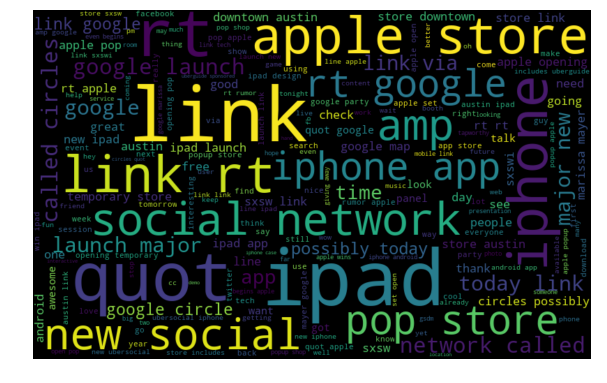

In [41]:
all_words = ' '.join([text for text in df['new_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

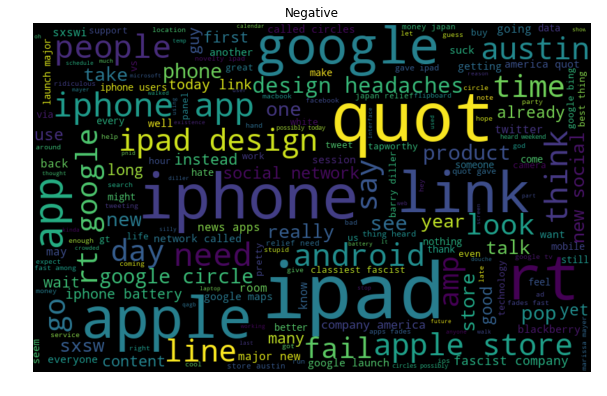

In [42]:
negative_words =' '.join([text for text in df['new_tweet'][df['sentiment'] == 0]])  #0=negative

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Negative')
plt.show()

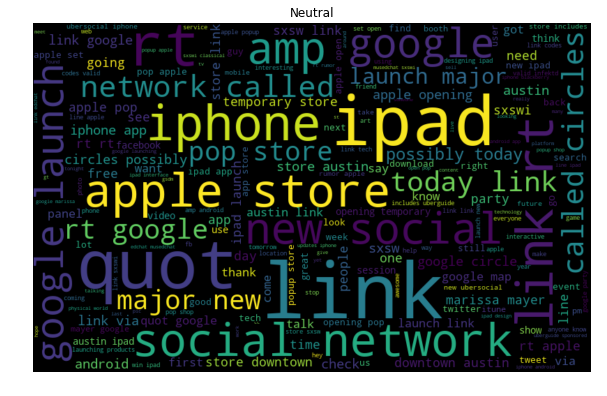

In [43]:
neutral_words =' '.join([text for text in df['new_tweet'][df['sentiment'] == 1]])  #1=neutral

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(neutral_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Neutral')
plt.show()

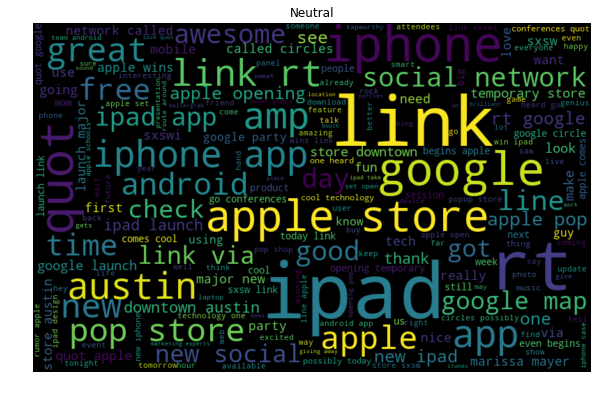

In [44]:
positive_words =' '.join([text for text in df['new_tweet'][df['sentiment'] == 2]]) #2=positive

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Neutral')
plt.show()

In [65]:
import seaborn as sns

In [66]:
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [68]:
# extracting hashtags from non racist/sexist tweets

HT_negative = hashtag_extract(df['new_tweet'][df['sentiment'] == 0])

# extracting hashtags from racist/sexist tweets
HT_neutral = hashtag_extract(df['new_tweet'][df['sentiment'] == 1])
HT_positive = hashtag_extract(df['new_tweet'][df['sentiment'] == 2])

# unnesting list

HT_negative = sum(HT_negative,[])
HT_neutral = sum(HT_neutral,[])
HT_positive = sum(HT_positive,[])


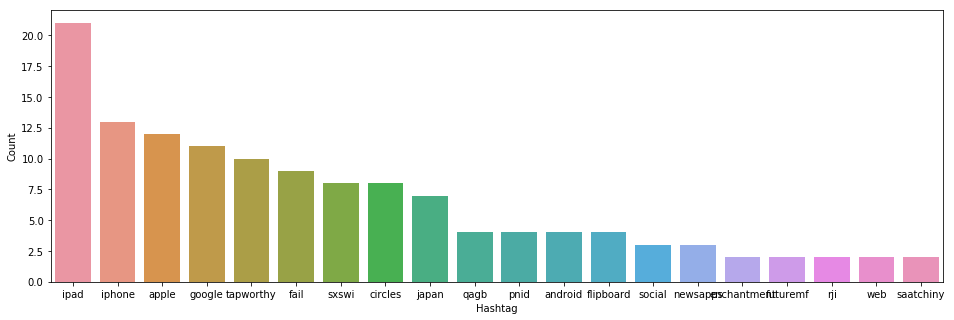

In [69]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

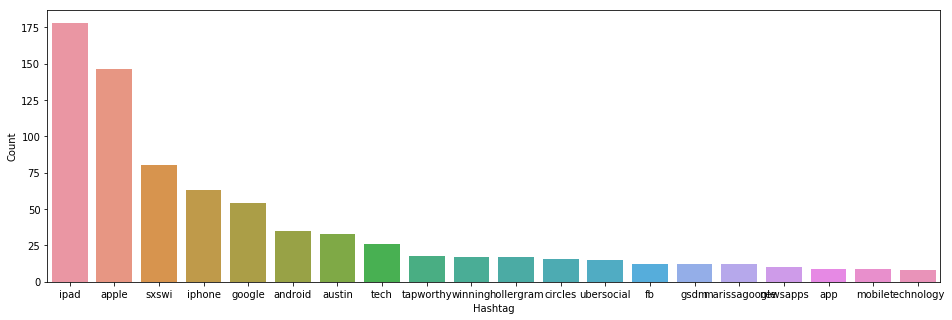

In [70]:
a = nltk.FreqDist(HT_positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

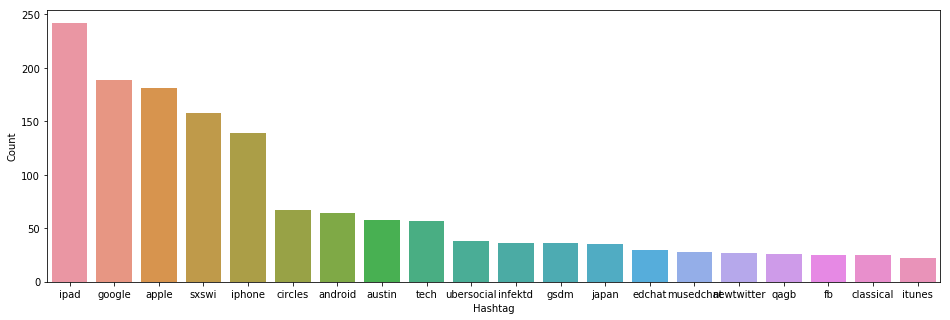

In [71]:
a = nltk.FreqDist(HT_neutral)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [46]:
X=df['new_tweet']
y=df['sentiment']

In [47]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=0)
tfv=TfidfVectorizer(ngram_range=(1,2))
from imblearn.under_sampling import TomekLinks
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [48]:
X_train_vect=tfv.fit_transform(X_train)

In [56]:
sm = TomekLinks()
X_ov, y_ov = sm.fit_resample(X_train_vect, y_train)
nb =  LogisticRegression()
nb.fit(X_ov,y_ov)
y_pred = nb.predict(tfv.transform(X_test))
from sklearn.metrics.classification import classification_report, accuracy_score
from sklearn.model_selection import cross_val_predict
print(classification_report(y_test,y_pred))
print("Accuracy::",accuracy_score(y_pred,y_test))

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       318
           1       0.64      0.95      0.77      3019
           2       0.64      0.21      0.32      1668

   micro avg       0.64      0.64      0.64      5005
   macro avg       0.43      0.39      0.36      5005
weighted avg       0.60      0.64      0.57      5005

Accuracy:: 0.6421578421578421


C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [50]:
from sklearn.svm import SVC
sm = TomekLinks()
X_ov, y_ov = sm.fit_resample(X_train_vect, y_train)
svm = SVC()
svm.fit(X_ov,y_ov)
y_pred = nb.predict(tfv.transform(X_test))
from sklearn.metrics.classification import classification_report, accuracy_score
from sklearn.model_selection import cross_val_predict
print(classification_report(y_test,y_pred))
print("Accuracy::",accuracy_score(y_pred,y_test))

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       318
           1       0.64      0.95      0.77      3019
           2       0.64      0.21      0.32      1668

   micro avg       0.64      0.64      0.64      5005
   macro avg       0.43      0.39      0.36      5005
weighted avg       0.60      0.64      0.57      5005

Accuracy:: 0.6421578421578421


C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [57]:
sm = TomekLinks()
X_ov, y_ov = sm.fit_resample(X_train_vect, y_train)
rf =  RandomForestClassifier()
rf.fit(X_ov,y_ov)
y_pred = nb.predict(tfv.transform(X_test))
from sklearn.metrics.classification import classification_report, accuracy_score
from sklearn.model_selection import cross_val_predict
print(classification_report(y_test,y_pred))
print("Accuracy::",accuracy_score(y_pred,y_test))

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       318
           1       0.64      0.95      0.77      3019
           2       0.64      0.21      0.32      1668

   micro avg       0.64      0.64      0.64      5005
   macro avg       0.43      0.39      0.36      5005
weighted avg       0.60      0.64      0.57      5005

Accuracy:: 0.6421578421578421


C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [58]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
X_ov, y_ov = sm.fit_resample(X_train_vect, y_train)
dt= DecisionTreeClassifier()
dt.fit(X_mo, y_mo)
y_pred = nb.predict(tfv.transform(X_test))
from sklearn.metrics.classification import classification_report, accuracy_score
from sklearn.model_selection import cross_val_predict
print(classification_report(y_test,y_pred))
print("Accuracy::",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       318
           1       0.64      0.95      0.77      3019
           2       0.64      0.21      0.32      1668

   micro avg       0.64      0.64      0.64      5005
   macro avg       0.43      0.39      0.36      5005
weighted avg       0.60      0.64      0.57      5005

Accuracy:: 0.6421578421578421


C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [59]:
from imblearn.over_sampling import SMOTE

In [62]:

smote = SMOTE(random_state=2)
X_mo, y_mo = smote.fit_resample(X_train_vect, y_train)
rf =  RandomForestClassifier()
rf.fit(X_mo,y_mo)
y_pred = nb.predict(tfv.transform(X_test))
from sklearn.metrics.classification import classification_report, accuracy_score
from sklearn.model_selection import cross_val_predict
print(classification_report(y_test,y_pred))
print("Accuracy::",accuracy_score(y_pred,y_test))

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       318
           1       0.64      0.95      0.77      3019
           2       0.64      0.21      0.32      1668

   micro avg       0.64      0.64      0.64      5005
   macro avg       0.43      0.39      0.36      5005
weighted avg       0.60      0.64      0.57      5005

Accuracy:: 0.6421578421578421


C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [63]:


smote = SMOTE(random_state=2)
X_mo, y_mo = smote.fit_resample(X_train_vect, y_train)
rf_1 =  RandomForestClassifier()
rf_1.fit(X_mo,y_mo)
y_pred = nb.predict(tfv.transform(X_test))
from sklearn.metrics.classification import classification_report, accuracy_score
from sklearn.model_selection import cross_val_predict
print(classification_report(y_test,y_pred))
print("Accuracy::",accuracy_score(y_pred,y_test))

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       318
           1       0.64      0.95      0.77      3019
           2       0.64      0.21      0.32      1668

   micro avg       0.64      0.64      0.64      5005
   macro avg       0.43      0.39      0.36      5005
weighted avg       0.60      0.64      0.57      5005

Accuracy:: 0.6421578421578421


C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [64]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
smote = SMOTE(random_state=2)
X_mo, y_mo = smote.fit_resample(X_train_vect, y_train)
smote.fit(X_ov,y_ov)
y_pred = nb.predict(tfv.transform(X_test))
from sklearn.metrics.classification import classification_report, accuracy_score
from sklearn.model_selection import cross_val_predict
print(classification_report(y_test,y_pred))
print("Accuracy::",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       318
           1       0.64      0.95      0.77      3019
           2       0.64      0.21      0.32      1668

   micro avg       0.64      0.64      0.64      5005
   macro avg       0.43      0.39      0.36      5005
weighted avg       0.60      0.64      0.57      5005

Accuracy:: 0.6421578421578421


C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [61]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
smote = SMOTE(random_state=2)
X_mo, y_mo = smote.fit_resample(X_train_vect, y_train)
dt= DecisionTreeClassifier()
dt.fit(X_mo, y_mo)
y_pred = nb.predict(tfv.transform(X_test))
from sklearn.metrics.classification import classification_report, accuracy_score
from sklearn.model_selection import cross_val_predict
print(classification_report(y_test,y_pred))
print("Accuracy::",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       318
           1       0.64      0.95      0.77      3019
           2       0.64      0.21      0.32      1668

   micro avg       0.64      0.64      0.64      5005
   macro avg       0.43      0.39      0.36      5005
weighted avg       0.60      0.64      0.57      5005

Accuracy:: 0.6421578421578421


C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
rus = RandomUnderSampler(random_state=777)
X_RUS, y_RUS = rus.fit_sample(testing_tfidf, testing_target)
pd.DataFrame(X_RUS.todense(), columns=tv.get_feature_names())

In [ ]:

import os
import string
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [ ]:
# Using sklearn's Multinomial Naive Bayes
clf = MultinomialNB()
clf.fit(X_train_dataset,Y_train)
Y_test_pred = clf.predict(X_test_dataset)
sklearn_score_train = clf.score(X_train_dataset,Y_train)
print("Sklearn's score on training data :",sklearn_score_train)
sklearn_score_test = clf.score(X_test_dataset,Y_test)
print("Sklearn's score on testing data :",sklearn_score_test)
print("Classification report for testing data :-")
print(classification_report(Y_test, Y_test_pred))
